In [2]:
import cv2
import asociation
import matplotlib.pyplot as plt
import importlib


# Recarga el módulo para que se reflejen los cambios
importlib.reload(asociation)

<module 'asociation' from 'c:\\Users\\abeld\\Desktop\\github\\label-ocr\\asociation.py'>

In [3]:
fields = ['part n (P)', 'cantidad (Q)', 'proveedor (V)', 'descripcion', 
            'lote (H)', 'serie(s)', 'ref. pld', 'op:', 'fecha']
metric_criteria = 'debajo'
proximity_threshold = 0.02
labelocr = asociation.LabelORCR(fields, ignore_caps=True, verbose=False, 
                     metric_criteria = metric_criteria, 
                     proximity_threshold = proximity_threshold)

[2024/10/21 23:57:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\abeld/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\abeld/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=

In [4]:
path = 'images/pladomin/pladomin6.jpg'
img = cv2.imread(path)

In [5]:
# Procesar el frame
labelocr.inferenciar_imagen(img)

[2024/10/21 23:57:20] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/21 23:57:20] ppocr DEBUG: dt_boxes num : 21, elapsed : 0.20116019248962402
[2024/10/21 23:57:21] ppocr DEBUG: rec_res num  : 21, elapsed : 0.5819365978240967
Umbral de distancia: 0.4
Mejor parecido: 
 	 Field: part n (p) 
 	 Deteccion:  part n P): 
 	 Distancia:  0.2
Mejor parecido: 
 	 Field: cantidad 
 	 Deteccion:  cantidad (Q): 
 	 Distancia:  0.38461538461538464
Mejor parecido: 
 	 Field: proveedor 
 	 Deteccion:  proveedor (V): 
 	 Distancia:  0.35714285714285715
Mejor parecido: 
 	 Field: descripcion 
 	 Deteccion:  descripcion: 
 	 Distancia:  0.08333333333333333
Mejor parecido: 
 	 Field: lote H 
 	 Deteccion:  Lote (H): 
 	 Distancia:  0.3333333333333333
Mejor parecido: 
 	 Field: serie(s) 
 	 Deteccion:  Serie(S): 
 	 Distancia:  0.1111111111111111
Mejor parecido: 
 	 Field: ref. pdl 
 	 Deteccion:  Ref.PLD 
 	 Distancia:  0.375
Mejor pa

{'part n (p)': {'det_field': [[[339.0, 282.0],
    [508.0, 286.0],
    [507.0, 320.0],
    [338.0, 315.0]],
   ('part n P):', 0.8179910778999329)],
  'det_value': [[[368.0, 417.0],
    [580.0, 417.0],
    [580.0, 451.0],
    [368.0, 451.0]],
   ('156987571', 0.9984107613563538)]},
 'cantidad': {'det_field': [[[795.0, 287.0],
    [986.0, 294.0],
    [985.0, 330.0],
    [794.0, 323.0]],
   ('cantidad (Q):', 0.9512034058570862)],
  'det_value': None},
 'proveedor': {'det_field': [[[1116.0, 300.0],
    [1316.0, 300.0],
    [1316.0, 334.0],
    [1116.0, 334.0]],
   ('proveedor (V):', 0.9428203701972961)],
  'det_value': [[[1110.0, 423.0],
    [1222.0, 423.0],
    [1222.0, 459.0],
    [1110.0, 459.0]],
   ('20168', 0.9983589053153992)]},
 'descripcion': {'det_field': [[[364.0, 472.0],
    [536.0, 472.0],
    [536.0, 500.0],
    [364.0, 500.0]],
   ('descripcion:', 0.9889707565307617)],
  'det_value': [[[376.0, 522.0],
    [1052.0, 526.0],
    [1052.0, 560.0],
    [376.0, 556.0]],
   ('CARGAD

In [2]:
import Levenshtein


In [5]:
w1 = 'ref. pld'
w2 = 'Ref. PLD' 
w2 = w2.lower()
distancia = Levenshtein.distance(w1, w2)
longitud_max = max(len(w1), len(w2))
distancia/longitud_max

0.0

[]

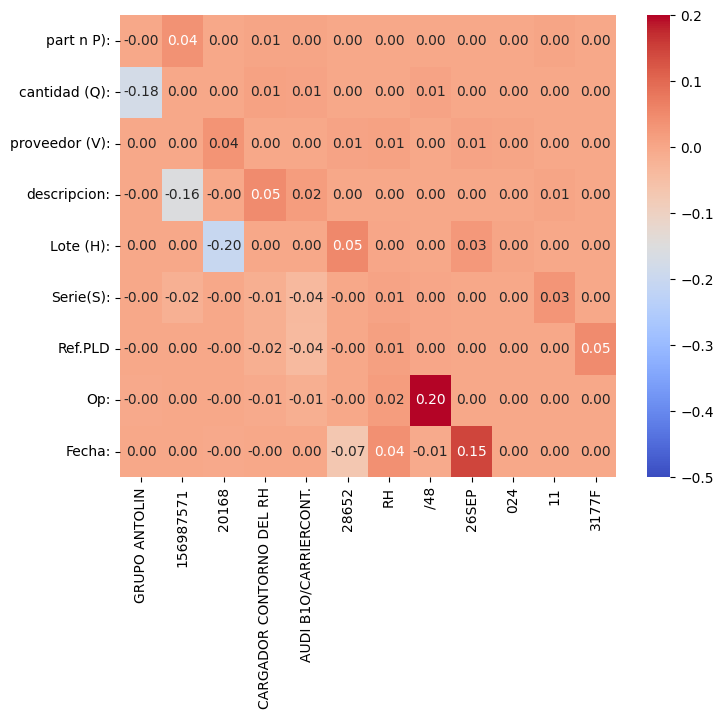

In [8]:
# Asociacion campo-valor:
fig, ax, heatmap = labelocr.plotear_matriz()
plt.plot()

In [9]:
# representacion de inferencia:
img_det = labelocr.dibujar_inferencia()
#bgr2rgb:
img_det[:,:, [0,1,2]] = img_det[:,:, [2,1,0]]

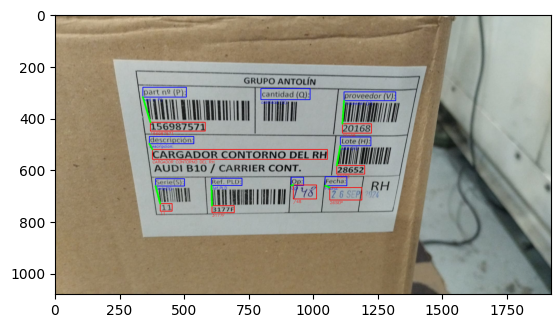

In [10]:
plt.imshow(img_det)
plt.show()

In [11]:
labelocr.asociados

{'part n (p)': {'det_field': [[[339.0, 282.0],
    [508.0, 286.0],
    [507.0, 320.0],
    [338.0, 315.0]],
   ('part n P):', 0.8179910778999329)],
  'det_value': [[[368.0, 417.0],
    [580.0, 417.0],
    [580.0, 451.0],
    [368.0, 451.0]],
   ('156987571', 0.9984107613563538)]},
 'cantidad': {'det_field': [[[795.0, 287.0],
    [986.0, 294.0],
    [985.0, 330.0],
    [794.0, 323.0]],
   ('cantidad (Q):', 0.9512034058570862)],
  'det_value': None},
 'proveedor': {'det_field': [[[1116.0, 300.0],
    [1316.0, 300.0],
    [1316.0, 334.0],
    [1116.0, 334.0]],
   ('proveedor (V):', 0.9428203701972961)],
  'det_value': [[[1110.0, 423.0],
    [1222.0, 423.0],
    [1222.0, 459.0],
    [1110.0, 459.0]],
   ('20168', 0.9983589053153992)]},
 'descripcion': {'det_field': [[[364.0, 472.0],
    [536.0, 472.0],
    [536.0, 500.0],
    [364.0, 500.0]],
   ('descripcion:', 0.9889707565307617)],
  'det_value': [[[376.0, 522.0],
    [1052.0, 526.0],
    [1052.0, 560.0],
    [376.0, 556.0]],
   ('CARGAD

In [21]:
import cv2
from pyzbar.pyzbar import decode
import numpy as np


def detectar_codigos_barras(image_path):
    # Cargar la imagen
    img = cv2.imread(image_path)

    # Detectar los códigos de barras en la imagen
    codigos = decode(img)

    resultados = []

    # Recorrer cada código detectado
    for codigo in codigos:
        # Obtener el contenido del código de barras
        data = codigo.data.decode('utf-8')
        
        # Obtener la posición del código (cuatro puntos del polígono)
        puntos = codigo.polygon

        # En algunos casos pyzbar puede retornar menos de 4 puntos, para esos casos se usa el rectángulo
        if len(puntos) == 4:
            print('puntos: ', data, 'coords:', puntos)
            # Dibujar los límites del código en la imagen
            cv2.polylines(img, [np.array(puntos, dtype=np.int32)], isClosed=True, color=(0, 255, 0), thickness=2)
        else:
            print('rect: ', data)

            rect = codigo.rect
            cv2.rectangle(img, (rect.left, rect.top), (rect.left + rect.width, rect.top + rect.height), (0, 255, 0), 2)

        # Guardar los datos y la posición en la lista de resultados
        resultados.append({
            'data': data,
            'puntos': puntos
        })

    # # Mostrar la imagen con los códigos detectados
    # cv2.imshow('Codigos de Barras', img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    return resultados, img

# Ejemplo de uso
# image_path = 'imagen_con_codigos.jpg'  # Reemplaza con la ruta de tu imagen
resultados, img = detectar_codigos_barras(path)

# Imprimir resultados
for resultado in resultados:
    print(f"Código detectado: {resultado['data']}")
    print(f"Posición: {resultado['puntos']}")


rect:  11
rect:  28652
rect:  20168
rect:  50
Código detectado: 11
Posición: [Point(x=404, y=673), Point(x=405, y=683), Point(x=410, y=719), Point(x=411, y=723), Point(x=512, y=678)]
Código detectado: 28652
Posición: [Point(x=1098, y=579), Point(x=1099, y=577), Point(x=1106, y=519), Point(x=1106, y=515), Point(x=1105, y=521), Point(x=1099, y=569)]
Código detectado: 20168
Posición: [Point(x=1118, y=413), Point(x=1310, y=414), Point(x=1311, y=412), Point(x=1323, y=348), Point(x=1323, y=342), Point(x=1127, y=345), Point(x=1126, y=347), Point(x=1123, y=371)]
Código detectado: 50
Posición: [Point(x=811, y=377), Point(x=811, y=413), Point(x=922, y=412), Point(x=923, y=406), Point(x=926, y=350), Point(x=926, y=338), Point(x=812, y=339)]


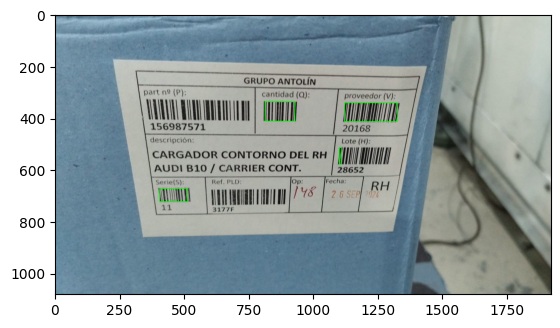

In [22]:
plt.imshow(img)
plt.show()